## Visualize UMAP

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))

In [2]:
umap_file <- file.path("results", "umap_embeddings_dilation50.csv.gz")
umap_df <- readr::read_csv(umap_file, show_col_types = FALSE) %>%
    dplyr::mutate(
        translocation_ratio = (
            TranslocatedNuclei_Intensity_IntegratedIntensity_CorrGasderminD /
            DilatedNuclei_Intensity_IntegratedIntensity_CorrGasderminD
            )
        )

print(dim(umap_df))
head(umap_df, 3)

[1] 17296    20


Metadata_wellName,Metadata_row,Metadata_col,Metadata_alias,Metadata_treatment,Metadata_dose,Metadata_ImageNumber,Metadata_Plate,Metadata_Well,Metadata_TranslocatedNuclei_Parent_DilatedNuclei,Metadata_TranslocatedNuclei_Parent_Nuclei,Metadata_DilatedNuclei_Number_Object_Number,Metadata_Nuclei_Number_Object_Number,UMAP0,UMAP1,TranslocatedNuclei_Intensity_IntegratedIntensity_CorrGasderminD,DilatedNuclei_Intensity_IntegratedIntensity_CorrGasderminD,TranslocatedNuclei_Neighbors_NumberOfNeighbors_Expanded,Metadata_dose_recode,translocation_ratio
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
A10,1,10,9,Disulfiram,2.5µM,19,70117_20230118MM1_Ab Test_V2,A10,1,1,1,1,9.128251,8.581470,17.83680,19.61257,3,high,0.9094576
A10,1,10,9,Disulfiram,2.5µM,19,70117_20230118MM1_Ab Test_V2,A10,4,1,4,1,9.154372,8.578030,15.10470,15.49714,5,high,0.9746767
A10,1,10,9,Disulfiram,2.5µM,19,70117_20230118MM1_Ab Test_V2,A10,2,2,2,2,5.802378,4.135841,14.48974,19.68905,3,high,0.7359289


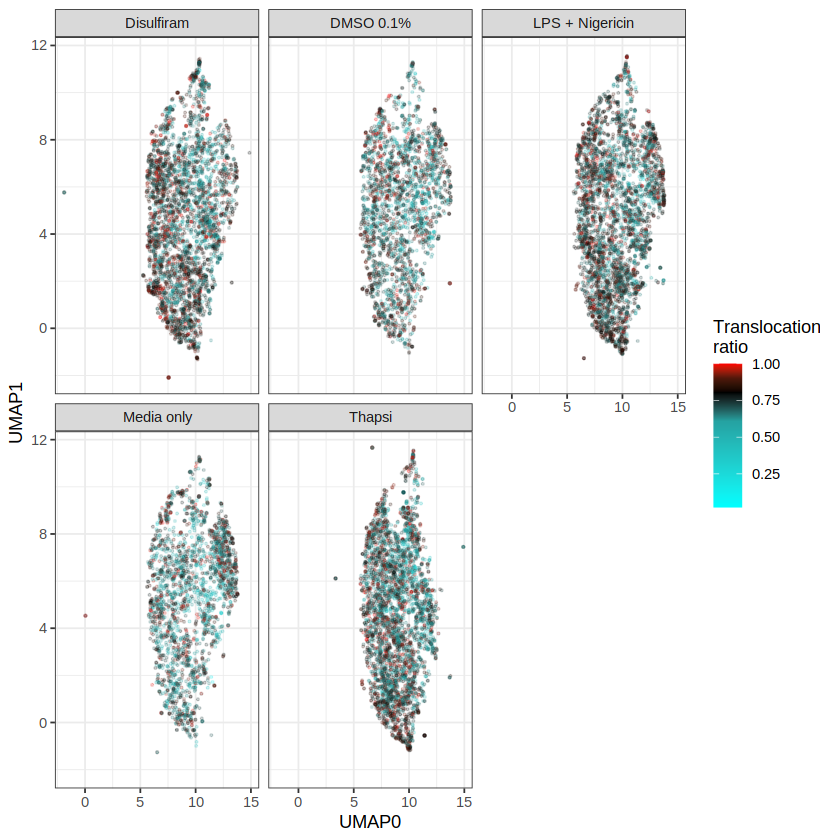

In [3]:
umap_gg <- (
    ggplot(umap_df, aes(x = UMAP0, y=UMAP1))
    + geom_point(
        aes(color = translocation_ratio),
        show.legend = TRUE,
        alpha = 0.2,
        size = 0.5
    )
    + theme_bw()
    + facet_wrap("~Metadata_treatment")
    + scale_color_gradientn(
        name = "Translocation\nratio",
        colors = c("cyan", "black", "red"),
        values = c(0, 0.6, 0.7, 0.8, 0.9, 0.95, 1)
    )
)

output_file <- file.path("figures", "umap_dilation50.png")
ggsave(output_file, umap_gg, height = 4, width = 6, dpi = 500)
umap_gg